#              THE BATTLE OF NEIGHBORHOODS - NEWYORK & TORONTO

## 1. INTRODUCTION

It is always interesting to discover what a city makes unique. If you have ever found yourself travelling to a new city, you might have lot of questions looking for similar areas you know of in your place. Or Let's say you are moving from a city to another for a new job and you want to know which area in the city has all the facilities as you live now. This idea drives this project. If you ask me the targeted audience of this project, its the common people and travellers who moves and visits places all over the world.The goal of this project is to compare the two cities, its neighborhoods and its amenities.

## 2. DATA OVERVIEW

From the problem statement, it is obvious that as we are comparing the locations, we need the geographical data
of the locations. The co-ordinates of the cities and neighborhoods are available in web. Then we will be using the 
Foursquare API to explore the venues around the neighborhood. For example, Let's say we have 'Bronx' in Newyork, we will 
have all the neighborhoods in that borough and from foursquare we will have all the amenities around that neighborhood.




## 3. METHODOLOGY

Now, we know the problem statement and the data required. Let's start the analysis!

We will be analyzing Toronto and Newyork seperately and the results will be compared to check how both are similar or disimilar. All the boroughs of Toronto and Newyork has been analyzed and the results are visualized. 

Each borough has many neighborhoods and each of the neighborhood is been explored using Foursquare API. All the amenities/venues in a particular neighborhood is been captured. Again, the Foursquare API is been used to get all the parent categories. Then the neighborhood venues is been assigned its own parent category. The results are then grouped and categorized to arrive at how many venues of each category(like Food, gym, pub, etc..) exists in a particular neighborhood/Borough. Our final dataset will include borough, Neighborhood, venues, venue-category, venue-parent category and geographical co-ordinates and any aggregate functions which we might use for analysis.

We have used K-Means clustering to segment and cluster the neighborhoods in each city and the results are visualized using MAP MARKERS. Also, BAR CHARTS have been created to visualize the precentage of each category in a neighborhood/Borough.




# Let's analyze Toronto First

In [1]:
# import required libraries
import lxml.html as lh
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Getting all areas of canada from web

In [2]:
#Get the wiki page
raw_wikipedia_page = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [3]:
#Retrieve the text content
page = raw_wikipedia_page.text

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'lxml')

In [5]:
#Get the required html table
pc_table = soup.find('table',{'class':'wikitable sortable'})
pc_table_str = str(pc_table)
#Convert the HTML table to data frame
df_pc = pd.read_html(pc_table_str, header=0)[0]
#Eliminate Not Assigned Boroughs
df_pc_valid = df_pc.loc[df_pc['Borough'] != 'Not assigned']
#Assign Borough to Neighbourhood when Neighbourhood is Not Assigned
df_pc_valid.Neighbourhood.replace('Not assigned',df_pc_valid.Borough, inplace=True)
#Merge Neibhoourhoods which share same postalcode
df_pc_valid = df_pc_valid.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
#Rename the comlumn name to PostalCode
df_pc_valid = df_pc_valid.rename(columns={'Postcode': 'PostalCode'})
df_pc_valid

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [6]:
#Print the count
df_pc_valid.shape

(103, 3)

## Get the latitude and longitude of all areas in canada

In [7]:
#Download Geospatial data
!wget -q -O 'geospatial_data.csv' http://cocl.us/Geospatial_data
print('geospatial_data downloaded!')

geospatial_data downloaded!


In [8]:
geospatial_data = pd.read_csv('geospatial_data.csv')
geospatial_data = geospatial_data.rename(columns={'Postal Code': 'PostalCode'})
#Add Latitude and Longitude for the Canada data
df_can = pd.merge(df_pc_valid,geospatial_data,how='inner',on='PostalCode')
df_can

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [9]:
#Filter Boroughs that has Toronto in its name 
df_toronto = df_can.loc[df_can['Borough'].str.contains("Toronto")].reset_index(drop=True)
df_toronto

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


In [10]:
df_toronto.shape

(38, 5)

In [ ]:
# Thus Toronto has 38 Neighborhoods which we will analyze further below

In [11]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


## Use Foursuare API to get the location details

In [12]:
CLIENT_ID = 'HNL05S02JYTO2VICOFV5SZ3JAY41V413CHE1JG5ZKP2WKDCA' # My Foursquare ID
CLIENT_SECRET = '3EFSZLZFDFJ5OVKNI1RQO3JBLS5A40TT40RVWNZIWDOSZJAL' # My Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HNL05S02JYTO2VICOFV5SZ3JAY41V413CHE1JG5ZKP2WKDCA
CLIENT_SECRET:3EFSZLZFDFJ5OVKNI1RQO3JBLS5A40TT40RVWNZIWDOSZJAL


In [13]:
# Lets explore the first neighborhood in our dataframe
df_toronto.loc[0, 'Neighbourhood']

'The Beaches'

In [14]:
neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


### Get the first 100 venues within 500 meters radius

In [ ]:
#Get top 100 venues within the radius of 500m
results = requests.get(url).json()
results

### Get all the categories that foursquare has.

In [17]:
urlForCategories = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
   CLIENT_SECRET, 
    VERSION)
urlForCategories 

'https://api.foursquare.com/v2/venues/categories?&client_id=HNL05S02JYTO2VICOFV5SZ3JAY41V413CHE1JG5ZKP2WKDCA&client_secret=3EFSZLZFDFJ5OVKNI1RQO3JBLS5A40TT40RVWNZIWDOSZJAL&v=20180605'

In [18]:
output = requests.get(urlForCategories).json()


In [19]:
output = output['response']['categories']
all_cat = json_normalize(output)
all_sub_cat = all_cat['categories']
type(all_sub_cat)


pandas.core.series.Series

### Functions to loop through the foursquare categories JSON

In [20]:
def get_parent_category_index_l2(eachSubCatList, inputSubCat):
    index = 0
    for eachSubCat in eachSubCatList:
        if(eachSubCat['name']==inputSubCat):
            return index
        else:
            lenOfInnerCat = len(eachSubCat['categories'])
            if(lenOfInnerCat > 0):
                inner_index = get_parent_category_index_l2(eachSubCat['categories'],inputSubCat)
                if(inner_index < lenOfInnerCat):
                    return index
        index += 1
    return index

In [21]:
def get_parent_category_index(all_sub_cat_temp, inputSubCat):
    index = 0
    for eachSubCatList in all_sub_cat_temp:
        inner_index = get_parent_category_index_l2(eachSubCatList,inputSubCat)
        if(inner_index < len(eachSubCatList)):
            return index
        index += 1
        #print(str(index))
    return index 

In [22]:
def get_parent_category(inputSubCat):
    rIndex = get_parent_category_index(all_sub_cat,inputSubCat)
    if (rIndex < len(all_cat.index)):
        return all_cat.loc[rIndex,'name']
    else:
        return 'Uncategorized'

In [23]:
def get_parent_category2(row):
    return get_parent_category(row['Venue Category'])

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON


In [26]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Grover Pub and Grub,Pub,43.679181,-79.297215
1,Starbucks,Coffee Shop,43.678798,-79.298045
2,Upper Beaches,Neighborhood,43.680563,-79.292869
3,Beaches Fitness,Gym / Fitness Center,43.680319,-79.290991
4,Dip 'n Sip,Coffee Shop,43.678897,-79.297745


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


### Get nearby venues for all neighborhood

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

In [30]:
#Let's check the resulting dataframe
print(toronto_venues.shape)
toronto_venues.head()

(1706, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
1,The Beaches,43.676357,-79.293031,Starbucks,43.678798,-79.298045,Coffee Shop
2,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
3,The Beaches,43.676357,-79.293031,Beaches Fitness,43.680319,-79.290991,Gym / Fitness Center
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop


# Let's get the parent category of each venue 

In [32]:
allVenueCategory = toronto_venues['Venue Category'].unique().tolist()

dfVenueCategoryMapping = pd.DataFrame(allVenueCategory, columns=['Venue Category']);
#dfVenuCategoryMapping['Parent Category'] = get_parent_category(dfVenuCategoryMapping['Venue Category'])
dfVenueCategoryMapping['Parent Category'] = dfVenueCategoryMapping.apply(get_parent_category2, axis=1)
dfVenueCategoryMapping.head()

,Venue Category,Parent Category
0,Pub,Nightlife Spot
1,Coffee Shop,Food
2,Neighborhood,Outdoors & Recreation
3,Gym / Fitness Center,Outdoors & Recreation
4,Greek Restaurant,Food


In [33]:
toronto_venues_with_parent = pd.merge(toronto_venues,dfVenueCategoryMapping,how='inner',on='Venue Category')

In [ ]:
toronto_venues_with_parent2 = pd.merge(toronto_venues_with_parent,df_toronto[['Neighbourhood','Borough']],how='inner',\
                          left_on=['Neighborhood'], right_on=['Neighbourhood'])
toronto_venues_with_parent2.drop(['Neighbourhood'], axis=1)

# Let's check how many venues of a category exists in a neighborhood

In [36]:
toronto_venues_with_parent3 = toronto_venues_with_parent2.groupby(['Borough','Parent Category'])
toronto_venues_with_parent4 = toronto_venues_with_parent3['Venue'].count().reset_index()
toronto_venues_with_parent4.head()

,Borough,Parent Category,Venue
0,Central Toronto,Arts & Entertainment,3
1,Central Toronto,Food,66
2,Central Toronto,Nightlife Spot,5
3,Central Toronto,Outdoors & Recreation,15
4,Central Toronto,Professional & Other Places,1


In [37]:
toronto_map = toronto_venues_with_parent4.pivot(index='Borough', columns='Parent Category', values='Venue')

# Let's visualize the categories of each borough as bar chart

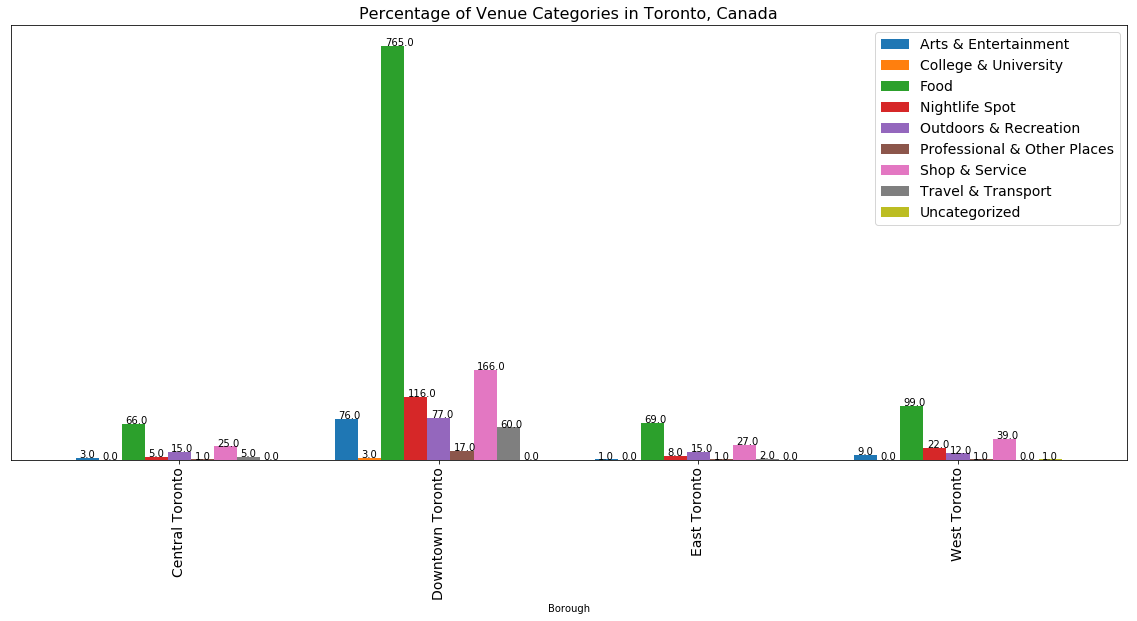

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
ax = toronto_map.plot(kind='bar',figsize=(20, 8), width=0.8, fontsize=14)

ax.tick_params(left=False)
ax.tick_params(labelleft=False)
ax.set_title("Percentage of Venue Categories in Toronto, Canada", fontsize =16)
ax.legend(fontsize=14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(str(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))


#### Thus borough 'Downtown Toronto' has more restaurants than other boroughs clearly. 
#### Similarly we can visualize few other facts from the chart..

In [41]:
#Let's check how many venues returned for each neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,54,54,54,54,54,54
"Brockton, Exhibition Place, Parkdale Village",19,19,19,19,19,19
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",14,14,14,14,14,14
"Cabbagetown, St. James Town",47,47,47,47,47,47
Central Bay Street,81,81,81,81,81,81
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,15,15,15,15,15,15


In [42]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 238 uniques categories.


In [43]:
# Below are the unique venue categories
toronto_venues['Venue Category'].unique()

array(['Pub', 'Coffee Shop', 'Neighborhood', 'Gym / Fitness Center',
       'Greek Restaurant', 'Ice Cream Shop', 'Cosmetics Shop',
       'Italian Restaurant', 'Yoga Studio', 'Health Food Store',
       'Brewery', 'Fruit & Vegetable Store', 'Pizza Place', 'Restaurant',
       'Juice Bar', 'Trail', 'Bookstore', 'Diner', 'Dessert Shop',
       'Bubble Tea Shop', 'Indian Restaurant', 'Spa', 'Grocery Store',
       'Bakery', 'Caribbean Restaurant', 'American Restaurant',
       'Liquor Store', 'Furniture / Home Store', 'Burger Joint', 'Gym',
       'Fish & Chips Shop', 'Park', 'Sushi Restaurant', 'Steakhouse',
       'Burrito Place', 'Pet Store', 'Fast Food Restaurant',
       'Movie Theater', 'Sandwich Place', 'Board Shop', 'Intersection',
       'Fish Market', 'Cheese Shop', 'Café', 'Comfort Food Restaurant',
       'Chinese Restaurant', 'Middle Eastern Restaurant',
       'Stationery Store', 'New American Restaurant',
       'Seafood Restaurant', 'Coworking Space', 'Music Store', 'Bar'

In [ ]:
toronto_venues['Neighborhood']

# Analyze Each Neighborhood

In [ ]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

In [47]:
toronto_onehot.shape

(1706, 238)

In [ ]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

# Lets print each neighborhood with top 5 commom venues

In [ ]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
# Let's put that into dataframe

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# New dataframe to display top ten venues for neighborhoods

In [52]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Steakhouse,American Restaurant,Hotel,Restaurant,Asian Restaurant,Bar,Gym
1,Berczy Park,Coffee Shop,Restaurant,Cocktail Bar,Cheese Shop,Bakery,Italian Restaurant,Beer Bar,Steakhouse,Seafood Restaurant,Pub
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Café,Breakfast Spot,Bar,Stadium,Italian Restaurant,Burrito Place,Climbing Gym,Office,Furniture / Home Store
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Park,Pizza Place,Recording Studio,Restaurant,Burrito Place,Brewery,Skate Park,Smoke Shop
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Terminal,Airport Service,Boutique,Sculpture Garden,Plane,Boat or Ferry,Airport Gate,Airport Food Court,Airport


# Cluster Neighborhoods

In [53]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [54]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Coffee Shop,Gym / Fitness Center,Pub,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1,Park,Sushi Restaurant,Board Shop,Brewery,Burger Joint,Sandwich Place,Burrito Place,Pub,Pet Store,Pizza Place
3,M4M,East Toronto,Studio District,43.659526,-79.340923,1,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Coworking Space,Seafood Restaurant,Sandwich Place,Cheese Shop
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Bus Line,Park,Swim School,Dim Sum Restaurant,Women's Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


# Examine Clusters

# Cluster 1

In [55]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,0,Bus Line,Park,Swim School,Dim Sum Restaurant,Women's Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


# Cluster 2

In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,1,Coffee Shop,Gym / Fitness Center,Pub,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
1,East Toronto,1,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Yoga Studio,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant
2,East Toronto,1,Park,Sushi Restaurant,Board Shop,Brewery,Burger Joint,Sandwich Place,Burrito Place,Pub,Pet Store,Pizza Place
3,East Toronto,1,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Coworking Space,Seafood Restaurant,Sandwich Place,Cheese Shop
5,Central Toronto,1,Park,Hotel,Burger Joint,Food & Drink Shop,Dance Studio,Clothing Store,Sandwich Place,Breakfast Spot,Grocery Store,Gym
6,Central Toronto,1,Sporting Goods Shop,Coffee Shop,Clothing Store,Salon / Barbershop,Sandwich Place,Diner,Rental Car Location,Furniture / Home Store,Dessert Shop,Chinese Restaurant
7,Central Toronto,1,Pizza Place,Dessert Shop,Sandwich Place,Italian Restaurant,Seafood Restaurant,Café,Sushi Restaurant,Coffee Shop,Chinese Restaurant,Diner
9,Central Toronto,1,Pub,Coffee Shop,Light Rail Station,Supermarket,Sushi Restaurant,Bagel Shop,Sports Bar,American Restaurant,Pizza Place,Vietnamese Restaurant
11,Downtown Toronto,1,Coffee Shop,Restaurant,Italian Restaurant,Pizza Place,Market,Pub,Bakery,Café,Pet Store,Caribbean Restaurant
12,Downtown Toronto,1,Japanese Restaurant,Sushi Restaurant,Coffee Shop,Gay Bar,Restaurant,Burger Joint,Bubble Tea Shop,Café,Fast Food Restaurant,Men's Store


# Cluster 3

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,2,Garden,Pool,Music Venue,Women's Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


# Cluster 4

In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,3,Playground,Gym,Tennis Court,Park,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Diner,Electronics Store
10,Downtown Toronto,3,Park,Playground,Trail,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Let's analyze Newyork now.

In [60]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [61]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [62]:
neighborhoods_ny_data = newyork_data['features']

##### Transform the data to pandas dataframe

In [63]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names)

In [64]:
# Loop through the data and fill the dataframe
for data in neighborhoods_ny_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
  

In [65]:
 print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_neighborhoods['Borough'].unique()),
        ny_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [66]:
# LEt's get the geographical coordinates of Manhattan
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
ny_latitude = location.latitude
ny_longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(ny_latitude, ny_longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


### Let's explore the newyork neighborhood

In [67]:
neighborhood_latitude = ny_neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = ny_neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = ny_neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


## Get the nearby neighborhood details from Foursquare API

In [68]:
# Now lets get the top 100 venues in Wakefield

# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=HNL05S02JYTO2VICOFV5SZ3JAY41V413CHE1JG5ZKP2WKDCA&client_secret=3EFSZLZFDFJ5OVKNI1RQO3JBLS5A40TT40RVWNZIWDOSZJAL&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [ ]:
result = requests.get(url).json()
result

In [70]:
venues = result['response']['groups'][0]['items']
    
nearby_venues_ny = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_ny =nearby_venues_ny.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_ny['venue.categories'] = nearby_venues_ny.apply(get_category_type, axis=1)

# clean columns
nearby_venues_ny.columns = [col.split(".")[-1] for col in nearby_venues_ny.columns]

nearby_venues_ny.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Rite Aid,Pharmacy,40.896521,-73.844680
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Dunkin Donuts,Donut Shop,40.890631,-73.849027
4,SUBWAY,Sandwich Place,40.890656,-73.849192


In [71]:
# How many venues returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues_ny.shape[0]))

9 venues were returned by Foursquare.


### Let's take first 150 rows for simplicity

In [72]:
ny_neighborhoods_selected = ny_neighborhoods.head(n=150)
ny_neighborhoods_selected.shape

(150, 4)

In [259]:
# Explore all neighborhoods

In [73]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [74]:
ny_venues = getNearbyVenues(names=ny_neighborhoods_selected['Neighborhood'],
                                   latitudes=ny_neighborhoods_selected['Latitude'],
                                   longitudes=ny_neighborhoods_selected['Longitude']
                                  )



Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

### Let's check the size of the resulting dataframe

In [75]:
print(ny_venues.shape)
ny_venues.head()

(6677, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896521,-73.844680,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Dunkin Donuts,40.890631,-73.849027,Donut Shop
4,Wakefield,40.894705,-73.847201,SUBWAY,40.890656,-73.849192,Sandwich Place


In [76]:
ny_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Astoria,100,100,100,100,100,100
Bath Beach,54,54,54,54,54,54
Battery Park City,100,100,100,100,100,100
Bay Ridge,87,87,87,87,87,87
Baychester,19,19,19,19,19,19
Bedford Park,39,39,39,39,39,39
Bedford Stuyvesant,27,27,27,27,27,27
Belmont,99,99,99,99,99,99
Bensonhurst,31,31,31,31,31,31


In [96]:
nyallVenueCategory = ny_venues['Venue Category'].unique().tolist()

nydfVenueCategoryMapping = pd.DataFrame(nyallVenueCategory, columns=['Venue Category']);
#dfVenuCategoryMapping['Parent Category'] = get_parent_category(dfVenuCategoryMapping['Venue Category'])
nydfVenueCategoryMapping['Parent Category'] = nydfVenueCategoryMapping.apply(get_parent_category2, axis=1)
nydfVenueCategoryMapping.head()

,Venue Category,Parent Category
0,Dessert Shop,Food
1,Pharmacy,Shop & Service
2,Ice Cream Shop,Food
3,Donut Shop,Food
4,Sandwich Place,Food


In [78]:
ny_venues_with_parent = pd.merge(ny_venues,nydfVenueCategoryMapping,how='inner',on='Venue Category')

In [ ]:
ny_venues_with_parent2 = pd.merge(ny_venues_with_parent,ny_neighborhoods[['Neighborhood','Borough']],how='inner',\
                          left_on=['Neighborhood'], right_on=['Neighborhood'])
ny_venues_with_parent2.drop(['Neighborhood'], axis=1)

In [81]:
ny_venues_with_parent3 = ny_venues_with_parent2.groupby(['Borough','Parent Category'])
ny_venues_with_parent4 = ny_venues_with_parent3['Venue'].count().reset_index()
ny_venues_with_parent4.head()

,Borough,Parent Category,Venue
0,Bronx,Arts & Entertainment,19
1,Bronx,Food,560
2,Bronx,Nightlife Spot,34
3,Bronx,Outdoors & Recreation,82
4,Bronx,Professional & Other Places,5


In [82]:
ny_map = ny_venues_with_parent4.pivot(index='Borough', columns='Parent Category', values='Venue')

## Let's visualize each category venue as bar chart similar to Toronto

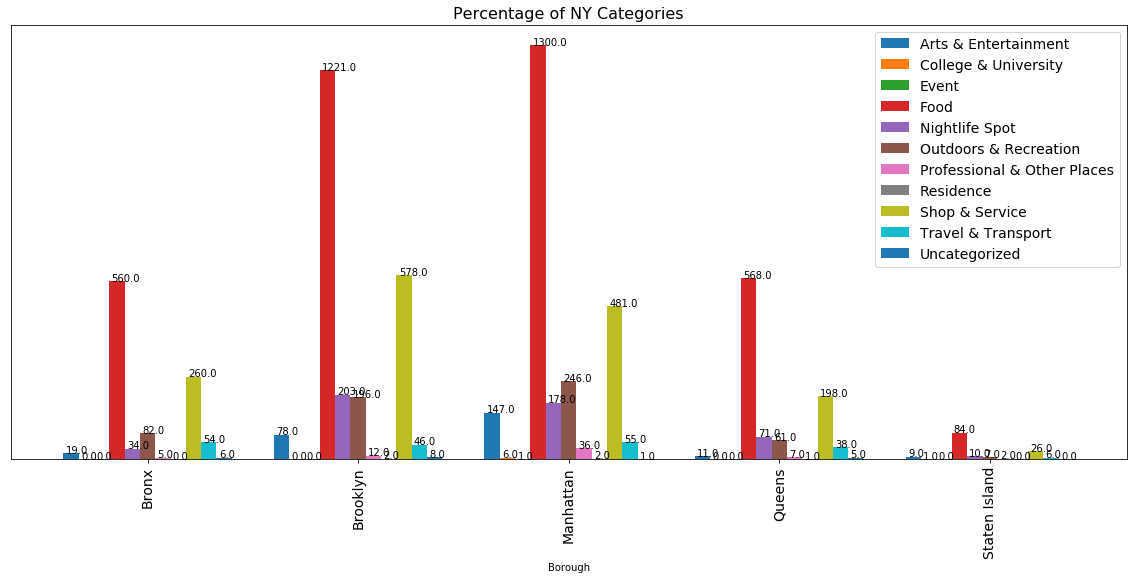

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
ax = ny_map.plot(kind='bar',figsize=(20, 8), width=0.8, fontsize=14)

ax.tick_params(left=False)
ax.tick_params(labelleft=False)
ax.set_title("Percentage of NY Categories", fontsize =16)
ax.legend(fontsize=14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(str(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

##### This barchart visualizes that Manhattan and Brooklyn are the most busiest boroughs. 

In [84]:
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 384 uniques categories.


## Analyze each neighborhood

In [ ]:
#one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

In [86]:
ny_onehot.shape

(6677, 384)

### Let's group neighborhood by taking mean

In [ ]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped

In [296]:
### Let's confirm the new size

In [88]:
ny_grouped.shape

(150, 384)

### Let's print each neighbrhood with top venues

In [89]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [90]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ny_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ny_neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    ny_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

ny_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Middle Eastern Restaurant,Bar,Hookah Bar,Bakery,Greek Restaurant,Seafood Restaurant,Pub,Italian Restaurant,Food Truck,Grocery Store
1,Bath Beach,Chinese Restaurant,Pizza Place,Pharmacy,Donut Shop,Women's Store,Italian Restaurant,Shoe Store,Fast Food Restaurant,Sushi Restaurant,Kids Store
2,Battery Park City,Coffee Shop,Park,Hotel,Italian Restaurant,Wine Shop,Cupcake Shop,Pizza Place,Plaza,Clothing Store,Gym
3,Bay Ridge,Italian Restaurant,Pizza Place,Spa,Bar,American Restaurant,Bagel Shop,Greek Restaurant,Sandwich Place,Sushi Restaurant,Playground
4,Baychester,Gym / Fitness Center,Donut Shop,Fried Chicken Joint,Food Service,Music Venue,Supermarket,Mexican Restaurant,Men's Store,Fast Food Restaurant,Mattress Store


### Cluster Neighborhoods - Use K-means clustering

In [91]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = ny_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 4, 4, 2, 1, 4, 2, 2, 0], dtype=int32)

In [92]:
# add clustering labels
ny_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
ny_neighborhoods_venues_sorted.head()


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Astoria,Middle Eastern Restaurant,Bar,Hookah Bar,Bakery,Greek Restaurant,Seafood Restaurant,Pub,Italian Restaurant,Food Truck,Grocery Store
1,2,Bath Beach,Chinese Restaurant,Pizza Place,Pharmacy,Donut Shop,Women's Store,Italian Restaurant,Shoe Store,Fast Food Restaurant,Sushi Restaurant,Kids Store
2,4,Battery Park City,Coffee Shop,Park,Hotel,Italian Restaurant,Wine Shop,Cupcake Shop,Pizza Place,Plaza,Clothing Store,Gym
3,4,Bay Ridge,Italian Restaurant,Pizza Place,Spa,Bar,American Restaurant,Bagel Shop,Greek Restaurant,Sandwich Place,Sushi Restaurant,Playground
4,2,Baychester,Gym / Fitness Center,Donut Shop,Fried Chicken Joint,Food Service,Music Venue,Supermarket,Mexican Restaurant,Men's Store,Fast Food Restaurant,Mattress Store


In [93]:
#ny_merged = ny_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
#ny_merged = ny_neighborhoods_venues_sorted.join(ny_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ny_merged = pd.merge(ny_neighborhoods_venues_sorted,ny_neighborhoods,how='inner',on='Neighborhood')

ny_merged.head() # check the last columns!


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
0,4,Astoria,Middle Eastern Restaurant,Bar,Hookah Bar,Bakery,Greek Restaurant,Seafood Restaurant,Pub,Italian Restaurant,Food Truck,Grocery Store,Queens,40.768509,-73.915654
1,2,Bath Beach,Chinese Restaurant,Pizza Place,Pharmacy,Donut Shop,Women's Store,Italian Restaurant,Shoe Store,Fast Food Restaurant,Sushi Restaurant,Kids Store,Brooklyn,40.599519,-73.998752
2,4,Battery Park City,Coffee Shop,Park,Hotel,Italian Restaurant,Wine Shop,Cupcake Shop,Pizza Place,Plaza,Clothing Store,Gym,Manhattan,40.711932,-74.016869
3,4,Bay Ridge,Italian Restaurant,Pizza Place,Spa,Bar,American Restaurant,Bagel Shop,Greek Restaurant,Sandwich Place,Sushi Restaurant,Playground,Brooklyn,40.625801,-74.030621
4,2,Baychester,Gym / Fitness Center,Donut Shop,Fried Chicken Joint,Food Service,Music Venue,Supermarket,Mexican Restaurant,Men's Store,Fast Food Restaurant,Mattress Store,Bronx,40.866858,-73.835798


## Let's visualize the NY clusters

In [94]:
# create map
map_clusters_ny = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_ny)
       
map_clusters_ny

### Cluster 1

In [95]:
ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[1] + list(range(2, ny_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
9,Bergen Beach,Harbor / Marina,Playground,Baseball Field,Athletics & Sports,Donut Shop,Park,Hockey Field,Food,Flower Shop,Event Service,Brooklyn,40.615150,-73.898556
14,Brownsville,Park,Restaurant,Moving Target,Pizza Place,Men's Store,Performing Arts Venue,Donut Shop,Burger Joint,Fried Chicken Joint,Discount Store,Brooklyn,40.663950,-73.910235
25,Clason Point,Park,Bus Stop,Grocery Store,Pool,Scenic Lookout,Boat or Ferry,South American Restaurant,Filipino Restaurant,Exhibit,Eye Doctor,Bronx,40.806551,-73.854144
50,Fieldston,River,Plaza,Playground,Women's Store,Fish & Chips Shop,Event Service,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Bronx,40.895437,-73.905643
120,Riverdale,Park,Plaza,Gym,Gym / Fitness Center,Bank,Home Service,Playground,Food Truck,Dim Sum Restaurant,Filipino Restaurant,Bronx,40.890834,-73.912585
129,Spuyten Duyvil,Park,Thai Restaurant,Tennis Stadium,Asian Restaurant,Pizza Place,Pharmacy,Bank,Women's Store,Farmers Market,Event Space,Bronx,40.881395,-73.917190


In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[1] + list(range(2, ny_merged.shape[1]))]]

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 2, ny_merged.columns[[1] + list(range(2, ny_merged.shape[1]))]]

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 3, ny_merged.columns[[1] + list(range(2, ny_merged.shape[1]))]]

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 4, ny_merged.columns[[1] + list(range(2, ny_merged.shape[1]))]]

## 4. RESULTS

Now, we are done with all the data analysis and visualization with machine learning. 
As per the analysis above, NYC is obviously far bigger, has lot of neighborhoods (306 for 5 Boroughs). As you would have seen above analysis we have taken only first 150 neighborhoods which itself had returned 6677 venues. Whereas Toronto city has 38 neighborhoods with 1706 venues. Considering neighborhood, amenities etc, NYC is seven-eight times bigger than the Toronto City.

Based on the count of categories in the neighborhood (see visualization for reference), we can actually determine that Manhattan is the busiest area in NYC having lots of amenities(which is expected anyways). I am going to take some of the key categories to compare here

Food:
As expected for any big city, you are going to find lot of restaurants in both NYC and Toronto. But an interesting observation is the proportion of gap between the food offerings and other services is more in Toronto than NYC. That means you will more like have a feeling of noticing lot of restaurants in Toronto whereas in reality NYC have more.

NightLife:
Known fact that NYC never sleeps but it was interesting to find not just Manhattan but Brooklyn and Bronx have good night life too. This is one thing you will be disappointed if you relocate to Toronto as it have very few options and most of the happening are only in the downtown. So if you planning to take an international honeymoon trip prefer NYC. 

Other Inferences:
 - Given the diversity and the size, NYC has best spread on services. From the classification chart you would have noticed the type of clusters and the spread of it in NYC where in Toronto almost all the neighborhood looks similar which is again good in some way. (Note: The machine learning K-means algorithm were able to split the Toronto neighborhoods into 4 clusters and NYC as five clusters based on the dataset we have provided. The marker maps will help you to visualize the clusters segregated)
 - It was surprising to see Brooklyn handles more or less same amount of shopping and services as Manhattan.


## 5. Discussion

As said above in the results section, NYC and Toronto has more dissimilarities than similarities.

You can find more offerings\services\options in New York than Toronto. Obviously this implies many factors which you can assume like high cost of living, more transport facilities, more people, ethnicity, etc. This does not mean that Toronto is not having good amenities. The results convey that NYC facilities are astounding. Now it's entirely depends on a person to choose between New York or Toronto. One good similarity is, Toronto is going to offer you almost all food categories that you can find in NYC. 

## 6. Conclusion

Definitely the above analysis is of help when analyzing a new location when looking for places/facilities. 

But still there is a LARGE scope of improvement in the dataset. We did not consider one main data entity in this analysis which is People.

The Next step would be to 
 - Get the Census data which will help to bridge the gap of people in the analysis
 - Get the Ratings & Price of the offerings\products and come up with which is cheaper or costlier when compared with other city. This information will be very handy when you want to relocate
 - Get the Crime Data and provide the safety rating and compare neighborhood with safety factor which provides same features. With the cost evaluated for the neighborhood already, mapping it with safety would be interesting to see.  

Most important outcome that I see from this project is, we have to first spend some time in analyzing which cities need to be compared. As in this case we are already aware NYC going to score better in lot of categories but it was fun anyways to evaluate and see that for a fact.
